In [7]:
from segmuilt_dataset import SegMuiltDataset

In [8]:
data_root = r'/home/wanghaifeng/project_work/datasets/flood_dataset_competition/Track2/Track2'
dataset = SegMuiltDataset(img_dirs=['train'],use_sub=['images','labels'],data_root=data_root)

init SegMuiltDataset
loading data num:  306 /home/wanghaifeng/project_work/datasets/flood_dataset_competition/Track2/Track2/train/images/*.tif


In [9]:
img = dataset.__getitem__(0)

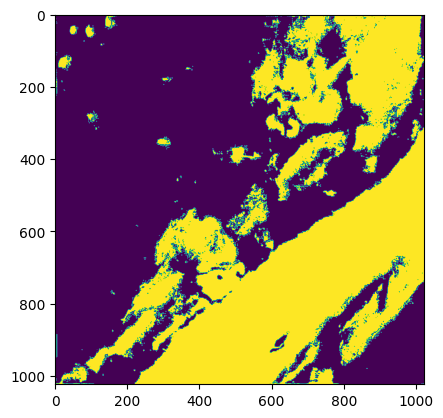

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img['labels'][2]>2)

In [16]:
import albumentations as A  
  
# 定义一个增强管道  
transform = A.Compose([  
    A.HorizontalFlip(p=0.5),  # 水平翻转  
    A.RandomRotate90(p=0.5),  # 随机旋转90度倍数  
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=15, p=0.5),  # 平移、缩放、旋转  
], p=1.0)  # 应用增强的概率  

image = img['images'].numpy()
mask = img['labels'].numpy()
augmented = transform(image=image.transpose(1,2,0), mask=mask.transpose(1,2,0))  

In [17]:
image = augmented['image']

In [21]:
image.shape

(1024, 1024, 12)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


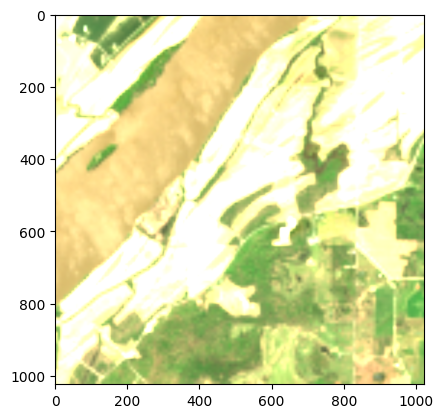

In [18]:
plt.imshow(image[:,:,[3,2,1]]/1000)

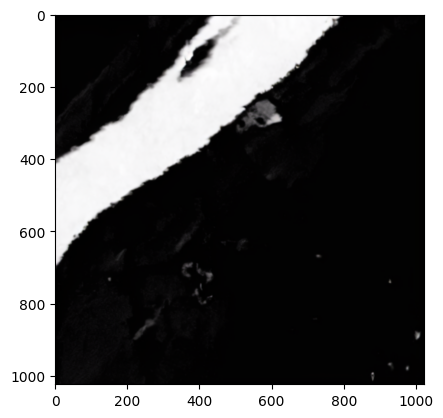

In [19]:
plt.imshow(augmented['mask'])